## Importing packages

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import math
from collections import Counter
from IPython.display import display_html
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler

## Importing data from the saved data in "Bachelor code to save data" code

In [2]:
%%time
TF_100events_combined = pd.read_csv("Events_100_edges_TF_100events_combined_pt1_125.csv")
TF_95events_combined = pd.read_csv("Events_100_edges_TF_95events_combined_pt1_125.csv")
TF_5events_combined = pd.read_csv("Events_100_edges_TF_5events_combined_pt1_125.csv")
print(len(TF_100events_combined),len(TF_95events_combined),len(TF_5events_combined),len(TF_95events_combined)+len(TF_5events_combined))
TF_50events_combined = pd.read_csv("Events_50_edges_TF_50events_combined_pt1_125.csv")
TF_47events_combined = pd.read_csv("Events_50_edges_TF_47events_combined_pt1_125.csv")
TF_3events_combined = pd.read_csv("Events_50_edges_TF_3events_combined_pt1_125.csv")
print(len(TF_50events_combined),len(TF_47events_combined),len(TF_3events_combined),len(TF_47events_combined)+len(TF_3events_combined))

267388 254467 12921 267388
136144 128921 7223 136144
Wall time: 1.47 s


## Making a MLP function where one can change hidden_layer_size and max_iter

In [3]:
def MLP_func(data_train,data_test,hidden_layer,max_iter):
    X_train = data_train[["z_node1","z_node2","r_node1","r_node2","phi_node1","phi_node2","x_node1","x_node2","y_node1","y_node2"]].copy()
    Y_train = data_train.Y_k
    X_test = data_test[["z_node1","z_node2","r_node1","r_node2","phi_node1","phi_node2","x_node1","x_node2","y_node1","y_node2"]].copy()
    Y_test = data_test.Y_k
    model = MLPClassifier(hidden_layer_sizes = hidden_layer,random_state=1, max_iter = max_iter)
    model.fit(X_train,Y_train)
    prop_train = model.predict(X_train)
    score_train = model.score(X_train,Y_train)
    prop_test = model.predict(X_test)
    score_test = model.score(X_test,Y_test)
    return X_train , Y_train , X_test,Y_test,prop_train , score_train , prop_test , score_test

In [4]:
%%time
# X_train_100 , Y_train_100 , X_test_100 , Y_test_100 ,prop_train_100 , score_train_100 , prop_test_100 , score_test_100 = MLP_func(TF_95events_combined,TF_5events_combined,(200,25),300)


Wall time: 0 ns


In [5]:
%%time
X_train_50 , Y_train_50 , X_test_50 , Y_test_50 ,prop_train_50 , score_train_50 , prop_test_50 , score_test_50 = MLP_func(TF_47events_combined,TF_3events_combined,(200,25),300)

Wall time: 2min 11s


In [6]:
print(len(X_train_50))

128921


### Loking at the results of the MLP function

In [7]:
%%time
def MLP_output_func(X_train , Y_train , X_test , Y_test ,prop_train , score_train , prop_test , score_test):
    True_predicted_train = Counter(prop_train)[1]
    False_predicted_train = Counter(prop_train)[0]
    print("Input data",len(Y_train),"Output data",len(prop_train))
    print("True_input vs True_output...:",Counter(Y_train)[1],"vs",True_predicted_train)
    print("False_input vs False_output...:",Counter(Y_train)[0],"vs",False_predicted_train)
    print(round(score_train,4)*100,"%")
    True_predicted_test = Counter(prop_test)[1]
    False_predicted_test = Counter(prop_test)[0]
    print(len(prop_test))
    print("True_input vs True_output...:",Counter(Y_test)[1],"vs",True_predicted_test)
    print("False_input vs False_output...:",Counter(Y_test)[0],"vs",False_predicted_test)
    print(round(score_test,4)*100,"%")


Wall time: 0 ns


In [11]:
%%time
MLP_output_func(X_train_50 , Y_train_50 , X_test_50 , Y_test_50 ,prop_train_50 , score_train_50 , prop_test_50 , score_test_50)

Input data 128921 Output data 128921
True_input vs True_output...: 69928 vs 72555
False_input vs False_output...: 58993 vs 56366
96.11 %
7223
True_input vs True_output...: 3927 vs 4066
False_input vs False_output...: 3296 vs 3157
95.64 %
Wall time: 57.8 ms


## PLoting the results from the MLP

In [9]:
def plot_func(X_test, prop_test, XY, ZR, figure_size):
    X_test_index = X_test.reset_index().drop("index",axis = 1)
    X_true = []
    for i, idx in enumerate(range(len(prop_test))):
        if prop_test[i] == 1:
            X_true.append(X_test_index.loc[idx])
    plt.rcParams['figure.figsize'] = figure_size
    edges = np.array(X_true)
    xyz = edges
    print(len(xyz))
    for i in range(len(xyz)):
        if XY == True:
            px = np.array([xyz[i,6],xyz[i,7]])
            py = np.array([xyz[i,8], xyz[i,9]])
            plt.scatter(px,py, s = 10, color = 'black')
            plt.plot(px,py, '--', alpha = 0.3, color = 'b')
            plt.xlim(-1100,1100)
            plt.ylim(-1100,1100)
        elif ZR == True:
                px = np.array([xyz[i,0],xyz[i,1]])
                py = np.array([xyz[i,2], xyz[i,3]])
                plt.scatter(px,py, s = 10, color = 'black')
                plt.plot(px,py, '--', alpha = 0.3, color = 'b')

4066
Wall time: 6.48 s


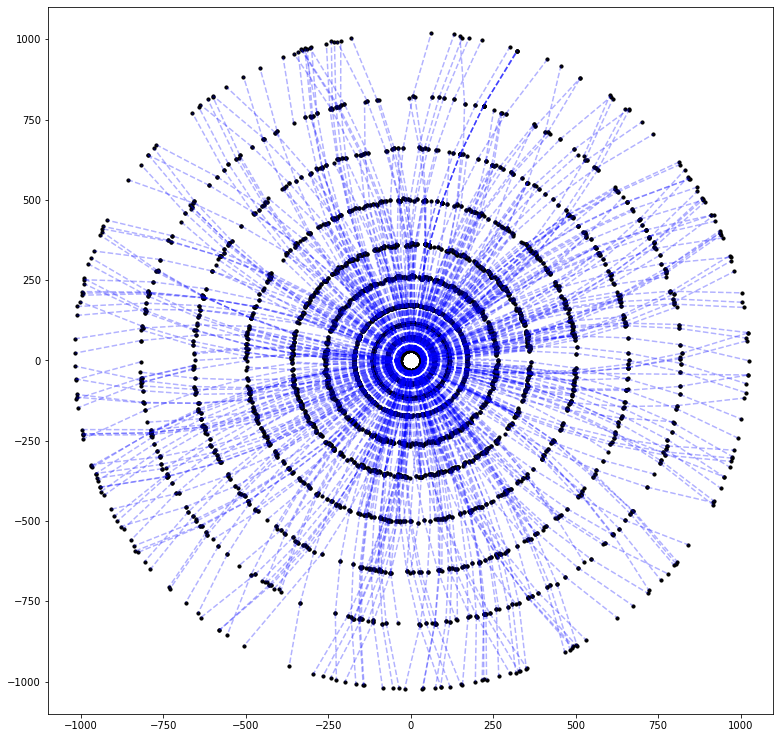

In [13]:
%%time
plot_func(X_test_50, prop_test_50, True, False, [13,13])

4066
Wall time: 48.7 s


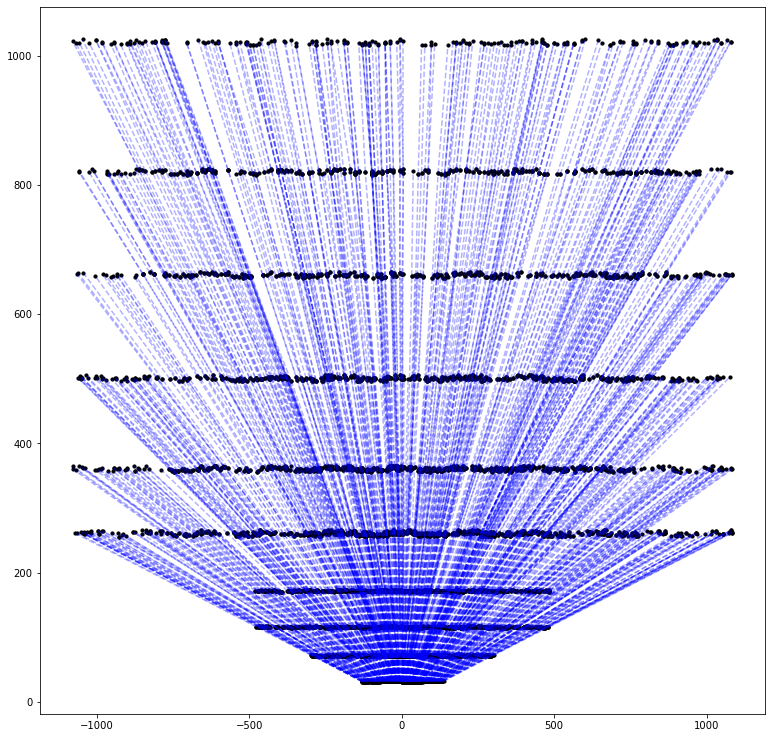

In [14]:
%%time
plot_func(X_test_50, prop_test_50, False, True, [13,13])